# **Projeto de aprendizado de máquina - SCC0530 - Inteligência Artificial**

| Integrantes do grupo | Número USP  |
|------|------|
|Rodrigo Teixeira Ribeiro da Silva|11816164|
|João Pedro Alonso|11832343|
|Allan Baldissin|8657904|

## **Índice**
1. Descrição do projeto
2. Operações com os datasets
    1. Drugs A, B, C, X, Y for decision trees
    2. Biomechanical features of orthopedic patients
    3. Single digit handwritten image

In [2]:
# Importações

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

----
# 1. Descrição do projeto

O relatório a seguir será composto da seguinte forma para cada um dos datasets:
- **Seção 1** - Descrição do dataset.

- **Selção 2** - Operações com o dataset

- **Seção 3** - Seleção da medida(s) de avaliação mais adequada aos datasets selecionados.

- **Seção 4** - Utilização de validação cruzada nos experimentos.

- **Seção 5** - Aplicação de algum dos seguintes algoritmos de classificação com diferentes configurações (hiperparâmetros): K-Nearest Neighbors (KNN), Naive Bayes, Árvores de Decisão e Multilayer Perceptron (MLP).

- **Seção 6** - Avaliação do modelo


----
# 2. Operações com os datasets

## 2.1. - Drugs A, B, C, X, Y for decision trees
**Mais informações sobre o dataset:** <a href="https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees">Clique aqui.</a>

2.1.1 - Descrição do dataset

O dataset a seguir contém dados sobre pacientes que sofreram da mesma doença. Durante o tratamento, cada paciente respondeu a um entre cinco medicamentos: A, B, C, X e Y.

Cada paciente possui os seguintes dados: idade, sexo, pressão sanguínea e colesterol, e o medicamente a qual cada paciente reagiu. A análise a seguir buscará prever qual medicamento será apropriada para um futuro paciente.

In [ ]:
# 2.1.2. - Operações com o dataset

# Importante e imprimindo dataset
df = pd.read_csv('data/dataset_1/drugs.csv', sep=',', na_values='?')
df

In [ ]:
# Pré-processamentos

# Primeiro os dados serão divididos entre colunas numéricas e não númericas
not_numeric = df.iloc[:, [1,2,3,5]]
numeric = df.iloc[:,[0, 4]]
not_numeric

In [ ]:
# Agora será utilizado o label encoder para transformar as colunas da tabela "not_numeric"

enc_not_numeric = not_numeric.copy()
for col in not_numeric.columns:
    lb = LabelEncoder()
    enc_not_numeric[col] = lb.fit_transform(not_numeric[col].values)
enc_not_numeric

In [ ]:
# E por fim os dados serão concetenados novamente na tabela

data = pd.concat([numeric, enc_not_numeric], axis = 1)
data

In [ ]:
# Através das visualizações acima, é possível dizer que a droga Y é consumida por todas as idaedes e contém o maior valor de Na_to_K
fig = px.scatter(df, x="Age", y="Cholesterol" , color = "Age" )
fig.show()

In [ ]:
## 2.1.3 - Avaliação dos dados

# Avaliando a distribuição dos dados
data.describe()

In [ ]:
# Checando por dados nulos
data.info()

In [ ]:
# Cheacando por dados duplicados
data.duplicated().sum()

In [ ]:
# Visualizado o dado alvo (resposta a ser obtida)
sns.countplot(x = data['Drug'], color= 'blue')

In [12]:
# Dividindo os dados entre os dados alvo (as drogas) e as variáveis que serão utilizadas para tomada de decisão
X = data.drop('Drug', axis = 1)
y = data['Drug']

In [ ]:

## 2.1.4 - Utilização das validações cruzadas

# Construção do modelo para árvore de decisão
clf = DecisionTreeClassifier()

# Definição dos parâmetros para validação cruzada
param_dist = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

rcv = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
rcv.fit(X, y)

In [ ]:
## 2.1.5 - Aplicação dos algoritmos de classificação

# Melhor acurácia de algoritmo de classificação
rcv.best_score_

In [ ]:
# Melhor algoritmo de classificação
rcv.best_estimator_

In [ ]:
# Melhores parâmetros para classificação
rcv.best_params_

In [17]:
# Definição da função de avaliação do modelo
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(5,5)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Contruindo a avaliação com o melhor modelo descoberto
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12).fit(X_train, y_train)

In [ ]:
## 2.1.6 - Avaliação do modelo

# Score da árvore de decisão com o melhor modelo aplicado
dt.score(X_train, y_train), dt.score(X_test, y_test)

In [ ]:
# Como visto, o modelo obteve quase 100% de acurácia tanto para o dataset de treinamento quanto para o de testes.

# A figura abaixo vai mostrar como o modelo preveu os valores e também as contagens, sendo que os blocos na diagonal são
# os valores corretamente previstos e os outros valores são os previstos de maneira errada.

model_evaluation(dt)


## 2.2. Biomechanical features of orthopedic patients
**Mais informações sobre o dataset:** <a href="https://www.kaggle.com/code/codeblogger/k-nearest-neighbors-knn-classification-75-25/notebook">Clique aqui.</a>

2.2.1 - Descrição do dataset

O dataset a seguir apresenta dados biomecânicos de alguns pacientes ortopédicos. Para cada paciente os seguintes dados são apresentados: incidência pélvica, inclinação pélvica, angulo da lordose lombar, declive sacral, raio da pelve, grau de espondilolistese, além de uma classificação como normal ou anormal de cada paciente.

O modelo a seguir utilizará o modelo KNN para, a partir do treinamento utilizando os dados do dataset, para prever a classificação de um possível novo paciente como normal ou anormal apartir de suas características biomecânicas.

In [37]:
df = pd.read_csv('data/dataset_2/orthopedical_pacients.csv')
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [22]:
## 2.2.2 - Pré-processamento

#Transformação da coluna class em um campo binário.
df["class"] = [ 1 if each == "Abnormal" else 0 for each in df["class"]]
data = df

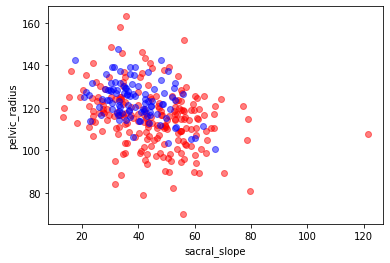

In [23]:
abnormal = df[df["class"] == 1]
normal = df[df["class"] == 0]

plt.scatter(abnormal.sacral_slope,abnormal.pelvic_radius,color="red",label="Abnormal",alpha=0.5)
plt.scatter(normal.sacral_slope,normal.pelvic_radius,color="blue",label="Normal",alpha=0.5)
plt.xlabel("sacral_slope")
plt.ylabel("pelvic_radius")
plt.show()

In [24]:
y = df["class"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
x_data = df.drop(["class"],axis=1) # axis=1 for columns
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [26]:
# Normalização do sistema para um processamento mais preciso
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [29]:
## 2.2.3 - Avaliação dos dados

# Avaliando a distribuição dos dados
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [28]:
# Checando por dados nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [27]:
# Cheacando por dados duplicados
data.duplicated().sum()

0

In [30]:
## 2.2.5 - Aplicação dos algoritmos de classificação

# Divisão dos dados para treinamento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
# Modelo KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors => key value
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [32]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1])

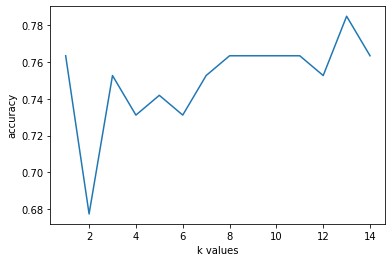

In [33]:
## 2.2.6 - Avaliação do modelo

# Encontrando o valor K
score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [36]:
# Como é possível ver no gráfico, o valor mais preciso de k é o 13.
# Então ele será utilizado na seção n_neighbors para o cálculo da acurácia.
# Resultando então em uma acurácia de 75% do modelo.

print("{} KNN score: {} ".format(13,knn.score(x_test,y_test)*100))

13 KNN score: 75.26881720430107 
